Source: https://sunscrapers.com/blog/data-cleaning-with-examples/?utm_source=facebook&utm_medium=group&utm_campaign=content&utm_content=data_science&fbclid=IwAR2jQbVajc6x6A0IaNo9eS6DI5lqoVQE7uxeDGFhBJAf8EPk_WP_mOo4TOA

We get two tables:
- traveler (users)
- travel (travel records)

In [1]:
import pandas as pd

# preparing data
traveler = pd.DataFrame({'user_id': [136, 284, 101, 529, 800, 823], 'age':
[None, 38, 30, 43, 49, 28], 'name': ["Ann", "Ben", "Tom", "Bianca", "Caroline",
"Kate"]})
travel = pd.DataFrame({'user_id': [101, 284, 136, 800, 101, 800, 823, 529, 284],
'date_of_journey': ['2018-01-16', '2017-07-13','2019-10-10','2018/03/20',
'2019-12-24', '2017-10-17','2016/11/02',
'2019/09/14', '2019-08-07'],'duration': [10, 10,7,13,7,11,14, 8, 12],
'destination': ["New Zeland", "australia", "Australia", "New_Zealand",
"Australia/","Australia", "New Zealand", "Australia", "New_zealand"], 'cost':
[None, 2325.0, 1760.0, 2740.0, 4000.0, 2475.0, 3140.0, 1840.0, 2910.0],
'currency': [None, 'EUR', 'GBP', 'GBP', 'GBP','EUR', 'GBP', 'GBP', 'GBP']})

traveler.to_csv("traveler.csv", index=False)
travel.to_csv("travel.csv", index=False)

## 1. Merging data from two CSV files

In [5]:
traveler = pd.read_csv("traveler.csv")
travel = pd.read_csv("travel.csv")

traveler

,user_id,age,name
0,136,NaN,Ann
1,284,38.0,Ben
2,101,30.0,Tom
3,529,43.0,Bianca
4,800,49.0,Caroline
5,823,28.0,Kate


In [6]:
travel

,user_id,date_of_journey,duration,destination,cost,currency
0,101,2018-01-16,10,New Zeland,NaN,NaN
1,284,2017-07-13,10,australia,2325.0,EUR
2,136,2019-10-10,7,Australia,1760.0,GBP
3,800,2018/03/20,13,New_Zealand,2740.0,GBP
4,101,2019-12-24,7,Australia/,4000.0,GBP
5,800,2017-10-17,11,Australia,2475.0,EUR
6,823,2016/11/02,14,New Zealand,3140.0,GBP
7,529,2019/09/14,8,Australia,1840.0,GBP
8,284,2019-08-07,12,New_zealand,2910.0,GBP


In [9]:
data = pd.merge(travel, traveler, on='user_id')
data

,user_id,date_of_journey,duration,destination,cost,currency,age,name
0,101,2018-01-16,10,New Zeland,NaN,NaN,30.0,Tom
1,101,2019-12-24,7,Australia/,4000.0,GBP,30.0,Tom
2,284,2017-07-13,10,australia,2325.0,EUR,38.0,Ben
3,284,2019-08-07,12,New_zealand,2910.0,GBP,38.0,Ben
4,136,2019-10-10,7,Australia,1760.0,GBP,NaN,Ann
5,800,2018/03/20,13,New_Zealand,2740.0,GBP,49.0,Caroline
6,800,2017-10-17,11,Australia,2475.0,EUR,49.0,Caroline
7,823,2016/11/02,14,New Zealand,3140.0,GBP,28.0,Kate
8,529,2019/09/14,8,Australia,1840.0,GBP,43.0,Bianca


## 2. Making data consistent
### 2a. Date
- use **infer_datetime_format**

In [8]:
data.date_of_journey = pd.to_datetime(data.date_of_journey, infer_datetime_format=True)
data

,user_id,date_of_journey,duration,destination,cost,currency,age,name
0,101,2018-01-16,10,New Zeland,NaN,NaN,30.0,Tom
1,101,2019-12-24,7,Australia/,4000.0,GBP,30.0,Tom
2,284,2017-07-13,10,australia,2325.0,EUR,38.0,Ben
3,284,2019-08-07,12,New_zealand,2910.0,GBP,38.0,Ben
4,136,2019-10-10,7,Australia,1760.0,GBP,NaN,Ann
5,800,2018-03-20,13,New_Zealand,2740.0,GBP,49.0,Caroline
6,800,2017-10-17,11,Australia,2475.0,EUR,49.0,Caroline
7,823,2016-11-02,14,New Zealand,3140.0,GBP,28.0,Kate
8,529,2019-09-14,8,Australia,1840.0,GBP,43.0,Bianca


### 2b. Cost
- Change all to GBP.
- EUR to GBP by multiplying 0.8.

In [10]:
data.loc[data.currency == 'EUR', ['cost']] = data.cost*0.8
data.currency.replace("EUR", "GBP", inplace=True)
data

,user_id,date_of_journey,duration,destination,cost,currency,age,name
0,101,2018-01-16,10,New Zeland,NaN,NaN,30.0,Tom
1,101,2019-12-24,7,Australia/,4000.0,GBP,30.0,Tom
2,284,2017-07-13,10,australia,1860.0,GBP,38.0,Ben
3,284,2019-08-07,12,New_zealand,2910.0,GBP,38.0,Ben
4,136,2019-10-10,7,Australia,1760.0,GBP,NaN,Ann
5,800,2018/03/20,13,New_Zealand,2740.0,GBP,49.0,Caroline
6,800,2017-10-17,11,Australia,1980.0,GBP,49.0,Caroline
7,823,2016/11/02,14,New Zealand,3140.0,GBP,28.0,Kate
8,529,2019/09/14,8,Australia,1840.0,GBP,43.0,Bianca


### 2c. Destination

In [11]:
data.destination.describe()

count             9
unique            7
top       Australia
freq              3
Name: destination, dtype: object

In [12]:
# We need to get all compromised categories and try to unify them
categories = data.destination.drop_duplicates()
print(categories)

0     New Zeland
1     Australia/
2      australia
3    New_zealand
4      Australia
5    New_Zealand
7    New Zealand
Name: destination, dtype: object


In [14]:
data.destination.loc[data.destination.str.lower().str.startswith('n', na=False)] = "new_zealand"
data.destination.loc[data.destination.str.lower().str.startswith('a', na=False)] = "australia"
data

C:\ProgramData\Miniconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,user_id,date_of_journey,duration,destination,cost,currency,age,name
0,101,2018-01-16,10,new_zealand,NaN,NaN,30.0,Tom
1,101,2019-12-24,7,australia,4000.0,GBP,30.0,Tom
2,284,2017-07-13,10,australia,1860.0,GBP,38.0,Ben
3,284,2019-08-07,12,new_zealand,2910.0,GBP,38.0,Ben
4,136,2019-10-10,7,australia,1760.0,GBP,NaN,Ann
5,800,2018/03/20,13,new_zealand,2740.0,GBP,49.0,Caroline
6,800,2017-10-17,11,australia,1980.0,GBP,49.0,Caroline
7,823,2016/11/02,14,new_zealand,3140.0,GBP,28.0,Kate
8,529,2019/09/14,8,australia,1840.0,GBP,43.0,Bianca


## 3. Deleting columns

In [16]:
data = data.drop(['currency', 'name'], axis=1)
data

,user_id,date_of_journey,duration,destination,cost,age
0,101,2018-01-16,10,new_zealand,NaN,30.0
1,101,2019-12-24,7,australia,4000.0,30.0
2,284,2017-07-13,10,australia,1860.0,38.0
3,284,2019-08-07,12,new_zealand,2910.0,38.0
4,136,2019-10-10,7,australia,1760.0,NaN
5,800,2018/03/20,13,new_zealand,2740.0,49.0
6,800,2017-10-17,11,australia,1980.0,49.0
7,823,2016/11/02,14,new_zealand,3140.0,28.0
8,529,2019/09/14,8,australia,1840.0,43.0


## 4. Missing values
- We can check whether there are any missing values data.isna() in the first cell.

In [17]:
data.isna()

,user_id,date_of_journey,duration,destination,cost,age
0,False,False,False,False,True,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,True
5,False,False,False,False,False,False
6,False,False,False,False,False,False
7,False,False,False,False,False,False
8,False,False,False,False,False,False


In our case, we’re going to fill the missing values with:
- cost with mean travel costs for ‘new_zealand’
- age with mean value calculated from age column

In [18]:
values = {'cost': data.cost.where(data.destination=='new_zealand').mean(), 'age':
round(data.age.mean())}
print('values:',values)
data = data.fillna(value=values, limit=1)
data

values: {'cost': 2930.0, 'age': 38.0}


,user_id,date_of_journey,duration,destination,cost,age
0,101,2018-01-16,10,new_zealand,2930.0,30.0
1,101,2019-12-24,7,australia,4000.0,30.0
2,284,2017-07-13,10,australia,1860.0,38.0
3,284,2019-08-07,12,new_zealand,2910.0,38.0
4,136,2019-10-10,7,australia,1760.0,38.0
5,800,2018/03/20,13,new_zealand,2740.0,49.0
6,800,2017-10-17,11,australia,1980.0,49.0
7,823,2016/11/02,14,new_zealand,3140.0,28.0
8,529,2019/09/14,8,australia,1840.0,43.0


## 5. Mapping values

In [19]:
data.destination.replace(('new_zealand', 'australia'), (0,1), inplace=True)
data

,user_id,date_of_journey,duration,destination,cost,age
0,101,2018-01-16,10,0,2930.0,30.0
1,101,2019-12-24,7,1,4000.0,30.0
2,284,2017-07-13,10,1,1860.0,38.0
3,284,2019-08-07,12,0,2910.0,38.0
4,136,2019-10-10,7,1,1760.0,38.0
5,800,2018/03/20,13,0,2740.0,49.0
6,800,2017-10-17,11,1,1980.0,49.0
7,823,2016/11/02,14,0,3140.0,28.0
8,529,2019/09/14,8,1,1840.0,43.0


## 6. Outliers
- The easiest way to notice outliers is by preparing plots. To do that, we will use **scatter plot** and **boxplot**.
- To detect outliers, we can also use clustering, analyse standard deviation, and many other strategies.

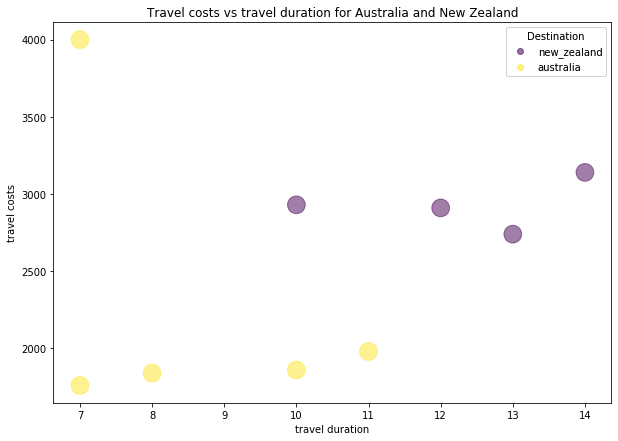

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
plt.rcParams['figure.figsize'] = [10, 7]

x = data.duration
y = data.cost
z = data.destination

fig, ax = plt.subplots()

scatter = ax.scatter(x, y, c=z, s=np.pi*100, marker='o',  alpha=0.5)

# produce a legend with the unique colors from the scatter
legend = ax.legend(*scatter.legend_elements(),
                    loc=1, title="Destination")
ax.add_artist(legend)
legend.get_texts()[0].set_text('new_zealand')
legend.get_texts()[1].set_text('australia')

plt.title('Travel costs vs travel duration for Australia and New Zealand')
plt.xlabel('travel duration')
plt.ylabel('travel costs')
plt.show()

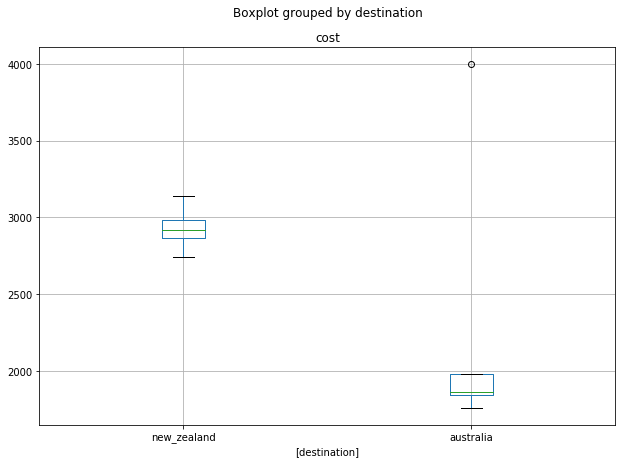

In [21]:
boxplot = data.boxplot(column=['cost'], by=['destination'])
plt.xticks([1, 2], ['new_zealand', 'australia']);

In [22]:
data = data.drop(data.index[data.cost == data.cost.max()], axis=0)
data

,user_id,date_of_journey,duration,destination,cost,age
0,101,2018-01-16,10,0,2930.0,30.0
2,284,2017-07-13,10,1,1860.0,38.0
3,284,2019-08-07,12,0,2910.0,38.0
4,136,2019-10-10,7,1,1760.0,38.0
5,800,2018/03/20,13,0,2740.0,49.0
6,800,2017-10-17,11,1,1980.0,49.0
7,823,2016/11/02,14,0,3140.0,28.0
8,529,2019/09/14,8,1,1840.0,43.0


## 7. Scaling
- We can use several scaling methods here. Our pick is the **Min-Max** algorithm, which uses the min and max value for calculation.

In [25]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
scaler.fit(data[['cost']])
print('Scaled cost value: \n', scaler.transform(data[['cost']]))

Scaled cost value: 
 [[0.84782609]
 [0.07246377]
 [0.83333333]
 [0.        ]
 [0.71014493]
 [0.15942029]
 [1.        ]
 [0.05797101]]


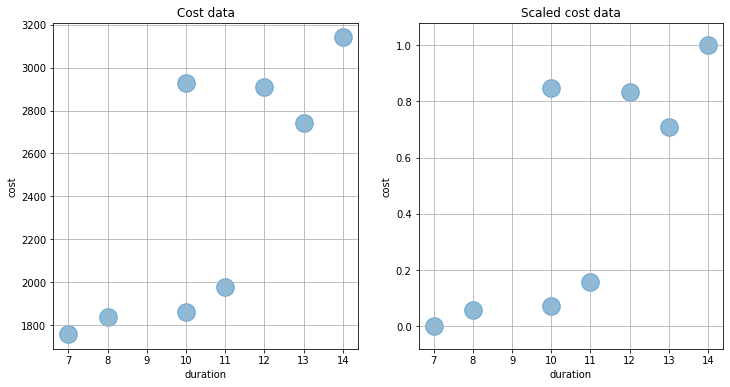

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
ax = plt.subplot(121)
plt.scatter(data.duration, data.cost, s=np.pi*100, marker='o',  alpha=0.5)
plt.title('Cost data')
plt.xlabel('duration', multialignment='center')
plt.ylabel('cost', multialignment='center')
plt.grid(True)

plt.subplot(122)
plt.scatter(data.duration, scaler.transform(data[['cost']]), s=np.pi*100,
marker='o',  alpha=0.5)
plt.title('Scaled cost data')
plt.xlabel('duration', multialignment='center')
plt.ylabel('cost', multialignment='center')
plt.grid(True)

plt.show()